In [131]:
import matplotlib.pyplot as plt
import datetime as dt
import time
import pandas as pd
import numpy as np


In [138]:
#Describe Dataset here
filename = 'data\zillow\MortgageRateConventionalFixed.csv'
mortgage_rates_src = pd.read_csv(filename)

#Describe Dataset here
filename = 'data\zillow\Affordability_Wide_2019Q2_Public.csv'
affordability_index_src = pd.read_csv(filename,encoding='latin-1')

#Describe Dataset here
filename = 'data\zillow\Affordability_Income_2018Q4.csv'
affordability_income_src = pd.read_csv(filename,encoding='latin-1')

#Median Rental Price - Single Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Sfr.csv'
median_rental_price_sfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Single Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Sfr.csv'
median_rental_price_sfr_sqft_src = pd.read_csv(filename)

#Median Rental Price - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Mfr5Plus.csv'
median_rental_price_mfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Mfr5Plus.csv'
median_rental_price_mfr_sqft_src = pd.read_csv(filename)

#Rental Index Per Square Foot - All Homes
filename = 'data\zillow\City_ZriPerSqft_AllHomes.csv'
rental_index_all_sqft_src = pd.read_csv(filename,encoding='latin-1')

#Median Value - All Homes
filename = 'data\zillow\City_Zhvi_AllHomes.csv'
median_value_all_src = pd.read_csv(filename,encoding='latin-1')

#Median Value Per Square Foot - All Homes
filename = 'data\zillow\City_MedianValuePerSqft_AllHomes.csv'
median_value_all_sqft_src = pd.read_csv(filename,encoding='latin-1')

#Count of Home Sales
filename = 'data\zillow\Sale_Counts_City.csv'
sales_count_src = pd.read_csv(filename,encoding='latin-1')

housing_crash_date = ['2008','12']

## Mortgage Rates - Monthly

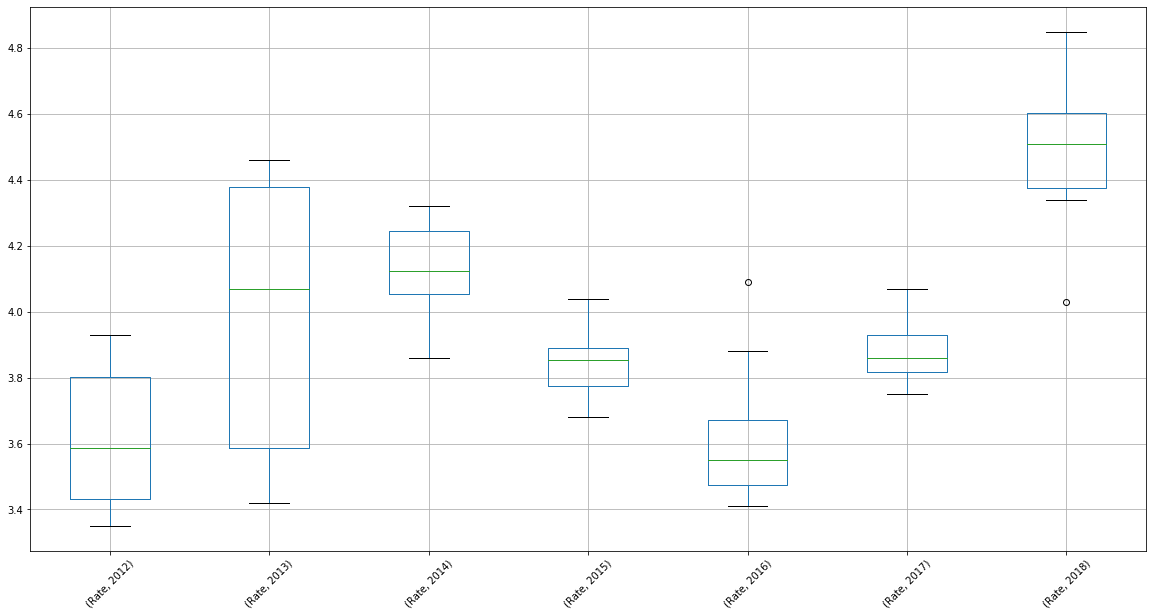

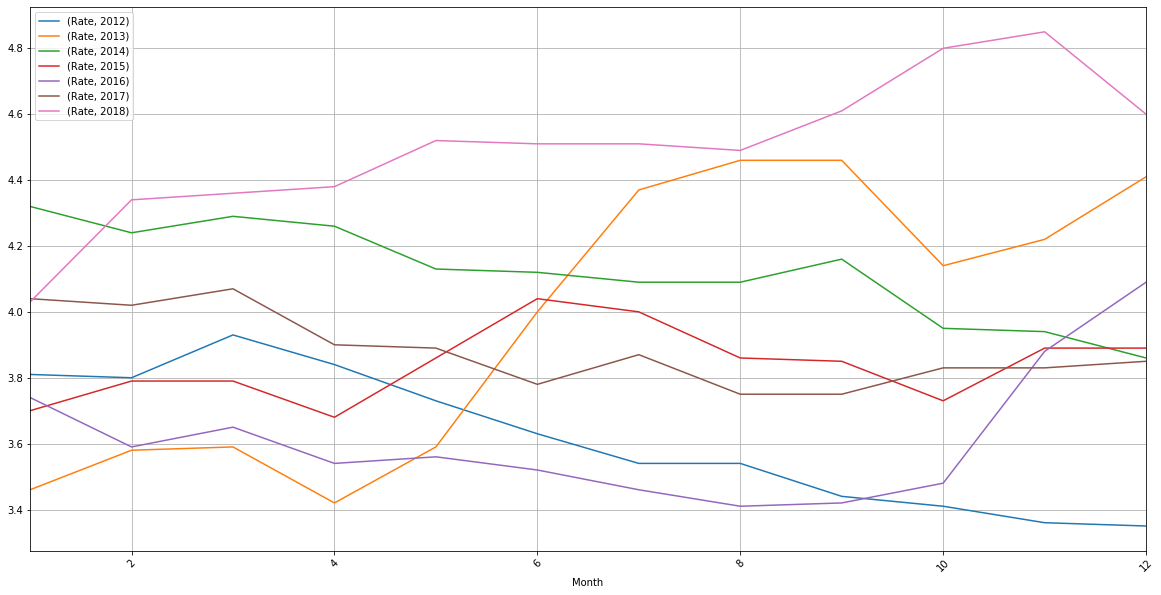

Rate                                    
Year   2012  2013  2014  2015  2016  2017  2018
Month                                          
1      3.81  3.46  4.32  3.70  3.74  4.04  4.03
2      3.80  3.58  4.24  3.79  3.59  4.02  4.34
3      3.93  3.59  4.29  3.79  3.65  4.07  4.36
4      3.84  3.42  4.26  3.68  3.54  3.90  4.38
5      3.73  3.59  4.13  3.86  3.56  3.89  4.52

In [92]:
mortgage_rates_monthly = mortgage_rates_src.copy()
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='TimePeriod')
mortgage_rates_monthly = mortgage_rates_monthly.rename(columns={'MortgageRateConventionalFixed':'Rate'})
mortgage_rates_monthly['Date'] = pd.to_datetime(mortgage_rates_monthly['Date'], format='%Y-%m-%d')
mortgage_rates_monthly['Year'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).year
mortgage_rates_monthly['Month'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).month
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='Date')
mortgage_rates_monthly = mortgage_rates_monthly[['Year','Month','Rate']]
mortgage_rates_monthly = mortgage_rates_monthly.groupby(['Year','Month']).median()
mortgage_rates_monthly = mortgage_rates_monthly.unstack(level=0).dropna(how='any',axis=1)
#Let's thorw up a quick plot to see change over time by Size / period
mortgage_rates_monthly.plot.box(rot=45, grid=True, figsize=(20,10))

mortgage_rates_monthly.plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

plt.show()
mortgage_rates_monthly.head()

## Affordability Index - Monthly
>**pti** - Price To Income Index <br>
**mga** - Mortgage Affordability Index <br>
**rta** - Rent Affordability Index <br>

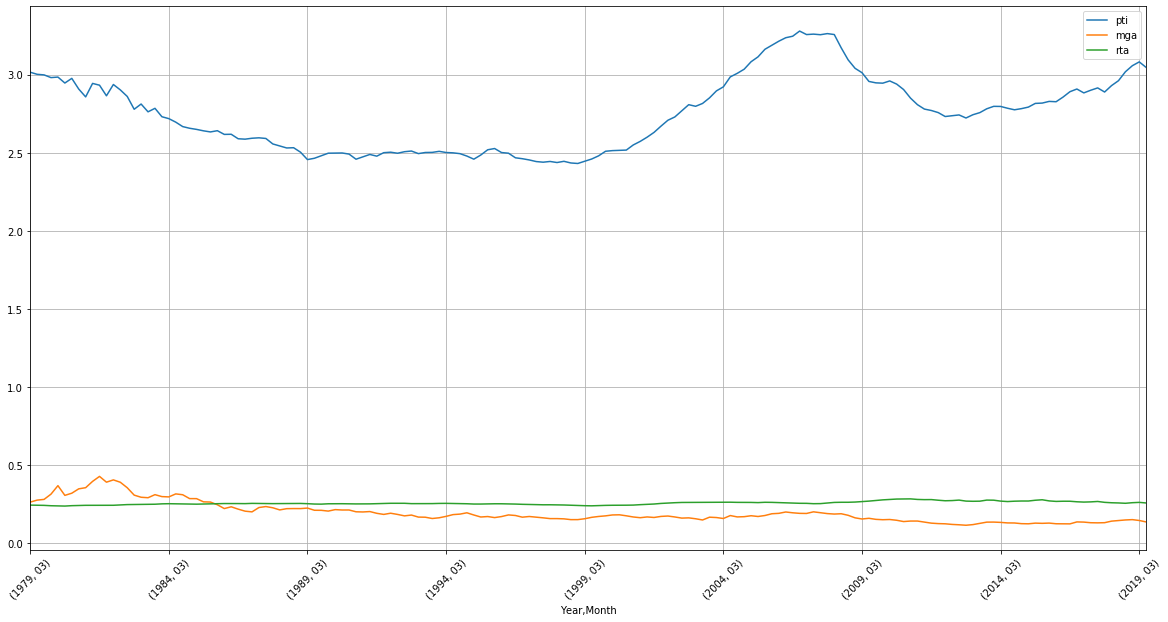

Year                                                                                                           1979  \
Month                                                                                                            03   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.928344   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.019673   
                 IL   Chicago                        394463   Chicago, IL                        3         3.035758   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         3.887457   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.388489   

Year                                                                                                                 \
Month                                                                                                            06   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.956635   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.141217   
                 IL   Chicago                        394463   Chicago, IL                        3         3.045651   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         4.025835   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.387368   

Year                                                                                                                 \
Month                                                                                                            09   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.966927   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.208146   
                 IL   Chicago                        394463   Chicago, IL                        3         2.984501   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         4.101038   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.389267   

Year                                                                                                                 \
Month                                                                                                            12   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.961860   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.278269   
                 IL   Chicago                        394463   Chicago, IL                        3         2.973171   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         4.130605   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.398643   

Year                                                                                                           1980  \
Month                                                                

In [93]:
affordability_index = affordability_index_src.copy()
affordability_index['State'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_index['City'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_index = affordability_index.drop(columns='HistoricAverage_1985thru1999')
affordability_index_us = affordability_index.query('City == "United States"')
affordability_index = affordability_index[~affordability_index['City'].str.contains("United States")]
affordability_index.set_index(['Index','State','City','RegionID','RegionName','SizeRank'],inplace=True)
affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])
affordability_index = affordability_index#.stack(level=1)

# quick chart
affordability_index.query("Index == 'Price To Income'").median().plot(rot=45, grid=True, label='pti')
affordability_index.query("Index == 'Mortgage Affordability'").median().plot(rot=45, grid=True, label='mga')
affordability_index.query("Index == 'Rent Affordability'").median().plot(rot=45, grid=True, label='rta', figsize=(20,10))

plt.legend(loc='best')
plt.show()

affordability_index.head()

## Median Income - Quarterly

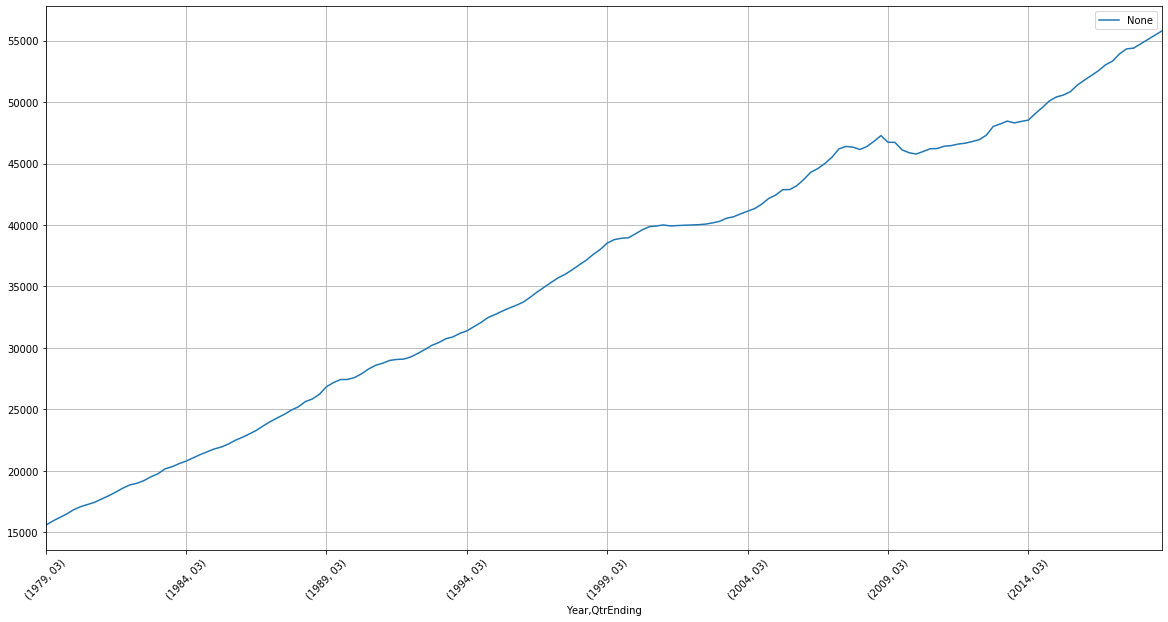

Year                                                                                           1979  \
QtrEnding                                                                                        03   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         17536.34   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         17913.83   
 IL   Chicago                        394463   Chicago, IL                        3         20056.35   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         18147.33   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         17530.66   

Year                                                                                                 \
QtrEnding                                                                                        06   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         17888.75   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         18285.02   
 IL   Chicago                        394463   Chicago, IL                        3         20460.12   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         18458.77   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         17869.90   

Year                                                                                                 \
QtrEnding                                                                                        09   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         18255.17   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         18746.27   
 IL   Chicago                        394463   Chicago, IL                        3         20910.06   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         18899.16   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         18248.18   

Year                                                                                                 \
QtrEnding                                                                                        12   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         18614.93   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         19213.79   
 IL   Chicago                        394463   Chicago, IL                        3         21267.37   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         19454.80   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         18589.76   

Year                                                                                           1980  \
QtrEnding                                                                                        03   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         19075.72   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         19782.36   
 IL   Chicago                        394463   Chicago, IL                        3         21678.20   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4

In [94]:
affordability_income = affordability_income_src.copy()
affordability_income['State'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_income['City'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#affordability_income = affordability_income.drop(columns=['RegionName','RegionID','SizeRank'])
affordability_income_us = affordability_income.query('City == "United States"')
affordability_income = affordability_income[~affordability_income['City'].str.contains("United States")]
affordability_income.set_index(['State','City','RegionID','RegionName','SizeRank'],inplace=True)
affordability_income.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_income.columns],names=['Year','QtrEnding'])
affordability_income = affordability_income#.stack(level=0)

affordability_income.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

affordability_income.head()

## Median Rental Price - Single Family Residence

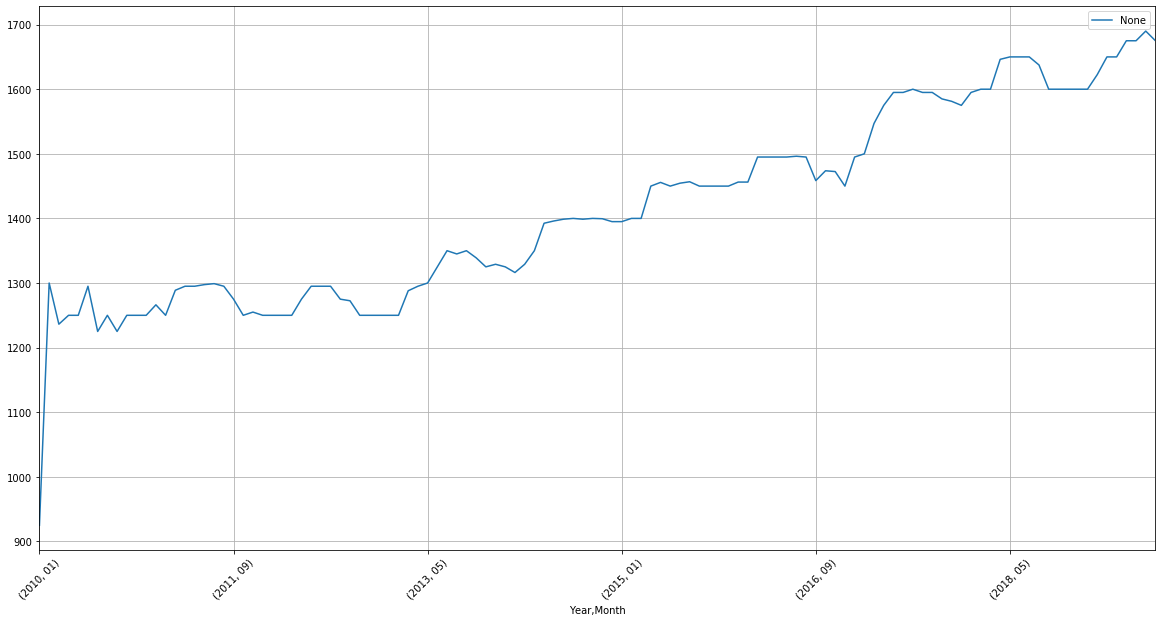

Year                                                                           2010  \
Month                                                                            01   
State RegionName  Metro                            CountyName         SizeRank        
NY    New York    New York-Newark-Jersey City      Queens County      1         NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3         NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5         NaN   

Year                                                                                \
Month                                                                           02   
State RegionName  Metro                            CountyName         SizeRank       
NY    New York    New York-Newark-Jersey City      Queens County      1        NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2        NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3        NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4        NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5        NaN   

Year                                                                                    \
Month                                                                               03   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1            NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2            NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1542.5   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               04   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1            NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2            NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1500.0   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               05   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1            NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2            NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1500.0   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               06   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1            NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2            NaN   
T

In [95]:
median_rental_price_sfr = median_rental_price_sfr_src.copy()
#median_rental_price_sfr['State'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_sfr['City'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_sfr = median_rental_price_sfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_sfr_us = median_rental_price_sfr.query('City == "United States"')
#median_rental_price_sfr = median_rental_price_sfr[~median_rental_price_sfr['City'].str.contains("United States")]
median_rental_price_sfr.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_sfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sfr.columns],names=['Year','Month'])
median_rental_price_sfr = median_rental_price_sfr#.stack(level=0)

median_rental_price_sfr.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_sfr.head()

## Median Rental Price Per Square Foot - Single Family Residence

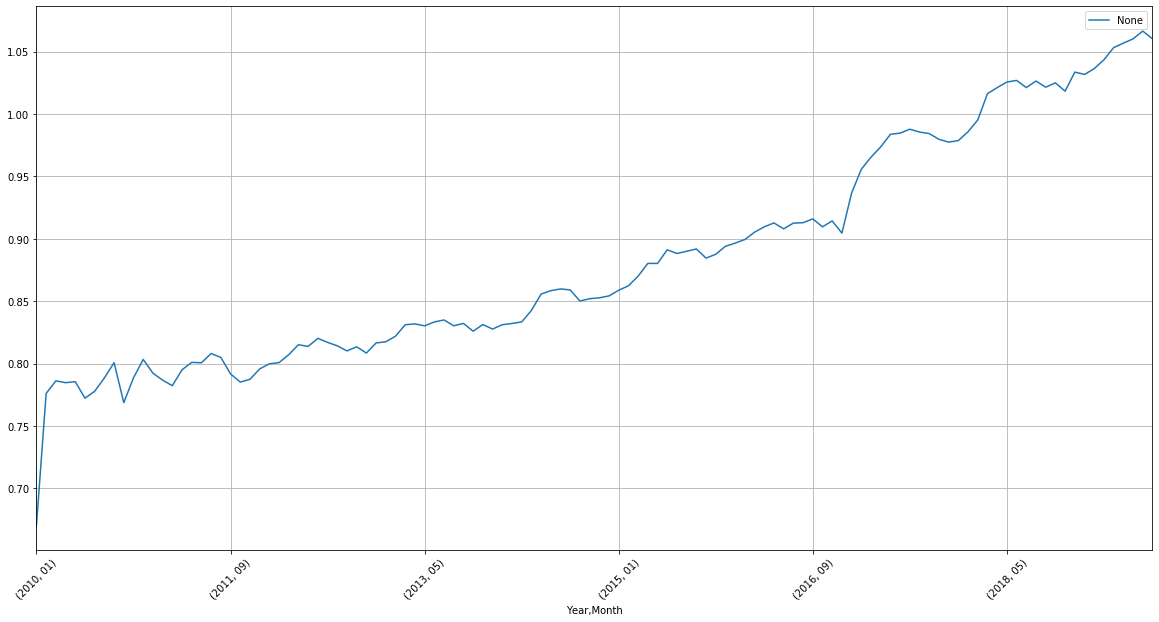

Year                                                                           2010  \
Month                                                                            01   
State RegionName  Metro                            CountyName         SizeRank        
NY    New York    New York-Newark-Jersey City      Queens County      1         NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3         NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5         NaN   

Year                                                                                \
Month                                                                           02   
State RegionName  Metro                            CountyName         SizeRank       
NY    New York    New York-Newark-Jersey City      Queens County      1        NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2        NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3        NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4        NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5        NaN   

Year                                                                                      \
Month                                                                                 03   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.676921   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3              NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4              NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5              NaN   

Year                                                                                      \
Month                                                                                 04   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.728179   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3              NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4              NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5              NaN   

Year                                                                                      \
Month                                                                                 05   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.725829   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3              NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4              NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5              NaN   

Year                                                                                      \
Month                                                                                 06   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long 

In [96]:
median_rental_price_sfr_sqft = median_rental_price_sfr_sqft_src.copy()
#median_rental_price_sfr_sqft['State'] = median_rental_price_sfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_sfr_sqft['City'] = median_rental_price_sfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_sfr_sqft = median_rental_price_sfr_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_sfr_sqft = median_rental_price_sfr_sqft.query('City == "United States"')
#median_rental_price_sfr_sqft = median_rental_price_sfr_sqft[~median_rental_price_sfr['City'].str.contains("United States")]
median_rental_price_sfr_sqft.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_sfr_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sfr_sqft.columns],names=['Year','Month'])
median_rental_price_sfr_sqft = median_rental_price_sfr_sqft#.stack(level=0)

median_rental_price_sfr_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_sfr_sqft.head()

## Median Rental Price - Multi Family Residence

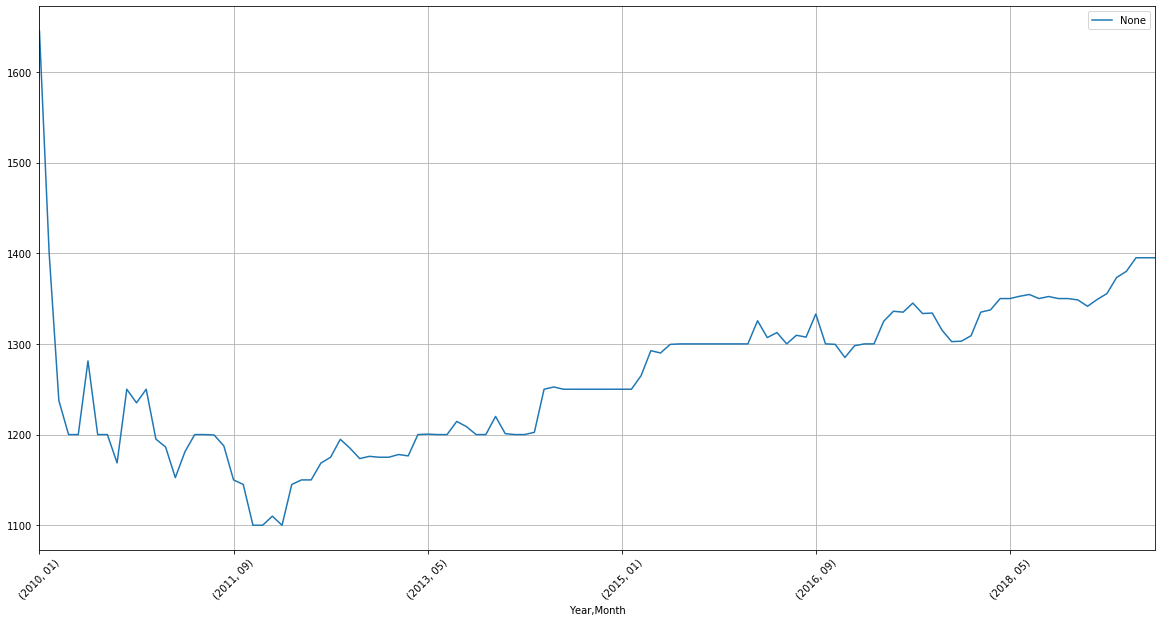

Year                                                                              2010  \
Month                                                                               01   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1            NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2            NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1645.0   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               02   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1         2200.0   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1762.5   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1350.0   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               03   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1         2397.5   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1750.0   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1315.0   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               04   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1         2500.0   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1945.0   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1325.0   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               05   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1         2450.0   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         2000.0   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3            NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1307.5   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5            NaN   

Year                                                                                    \
Month                                                                               06   
State RegionName  Metro                            CountyName         SizeRank           
NY    New York    New York-Newark-Jersey City      Queens County      1         2595.0   
CA    Los Angeles Los Angeles-Long 

In [97]:
median_rental_price_mfr = median_rental_price_mfr_src.copy()
#median_rental_price_mfr['State'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_mfr['City'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_mfr = median_rental_price_mfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_mfr = median_rental_price_mfr.query('City == "United States"')
#median_rental_price_mfr = median_rental_price_mfr[~median_rental_price_mfr['City'].str.contains("United States")]
median_rental_price_mfr.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_mfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_mfr.columns],names=['Year','Month'])
median_rental_price_mfr = median_rental_price_mfr#.stack(level=0)

median_rental_price_mfr.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_mfr.head()

## Median Rental Price Per Square Foot - Multi Family Residence

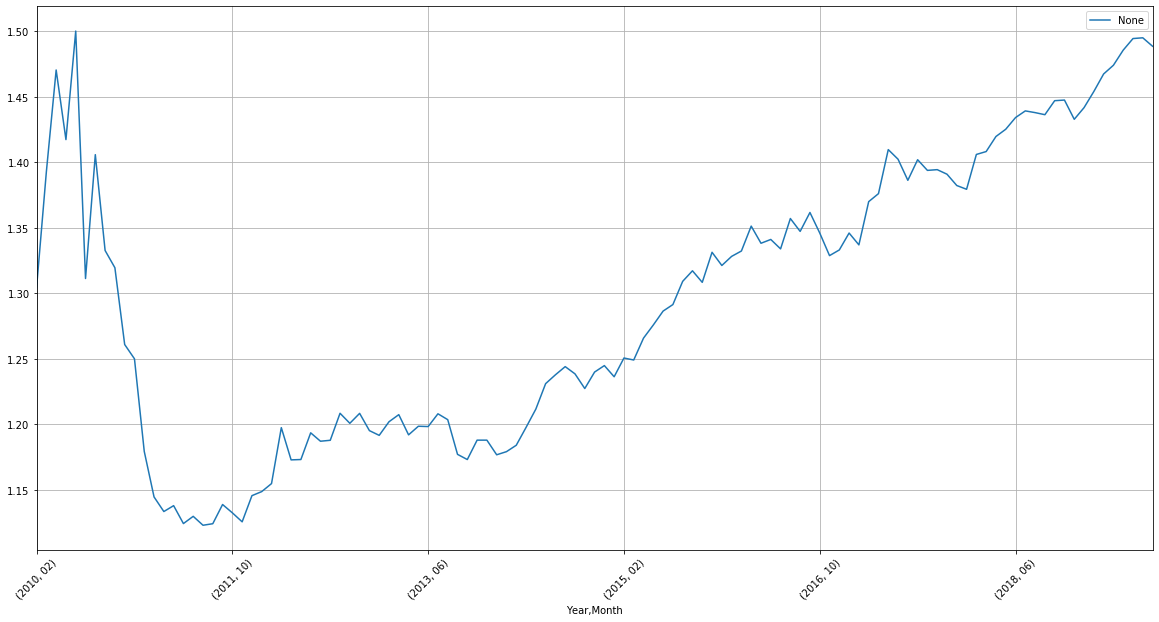

Year                                                                           2010  \
Month                                                                            02   
State RegionName  Metro                            CountyName         SizeRank        
NY    New York    New York-Newark-Jersey City      Queens County      1         NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         NaN   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3         NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         NaN   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5         NaN   

Year                                                                                      \
Month                                                                                 03   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.529126   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3              NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.392857   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5              NaN   

Year                                                                                      \
Month                                                                                 04   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.650546   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3              NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.470588   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5              NaN   

Year                                                                                      \
Month                                                                                 05   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.651665   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3              NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.417424   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5              NaN   

Year                                                                                      \
Month                                                                                 06   
State RegionName  Metro                            CountyName         SizeRank             
NY    New York    New York-Newark-Jersey City      Queens County      1              NaN   
CA    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.646133   
TX    Houston     Houston-The Woodlands-Sugar Land Harris County      3              NaN   
IL    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.500317   
TX    San Antonio San Antonio-New Braunfels        Bexar County       5              NaN   

Year                                                                                     \
Month                                                                                07   
State RegionName  Metro                            CountyName         SizeRank            
NY    New York    New York-Newark-Jersey City      Queens County      1           

In [98]:
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft_src.copy()
#median_rental_price_mfr_sqft['State'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_mfr_sqft['City'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_mfr_sqft = median_rental_price_mfr_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_mfr_sqft = median_rental_price_mfr_sqft.query('City == "United States"')
#median_rental_price_mfr_sqft = median_rental_price_mfr_sqft[~median_rental_price_mfr_sqft['City'].str.contains("United States")]
median_rental_price_mfr_sqft.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_mfr_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_mfr_sqft.columns],names=['Year','Month'])
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft#.stack(level=0)

median_rental_price_mfr_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_mfr_sqft.head()

## Rental Index Per Square Foot - All Homes

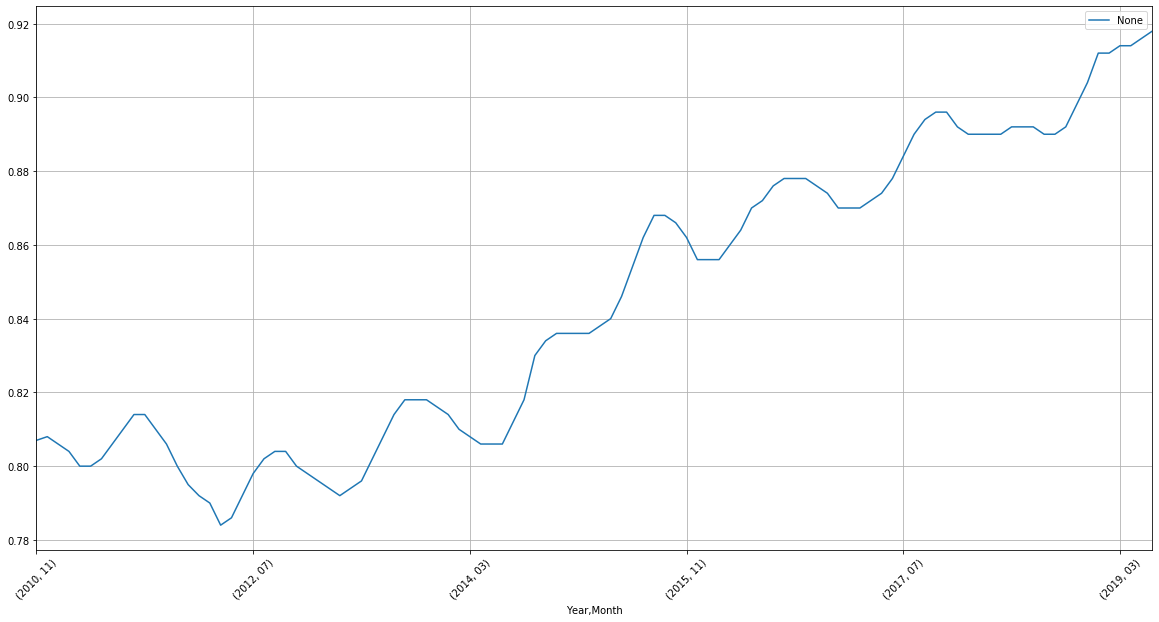

Year                                                                                      2010  \
Month                                                                                       11   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         1.446   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.584   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3         0.792   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.252   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5         0.696   

Year                                                                                            \
Month                                                                                       12   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         1.452   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.582   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3         0.782   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.256   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5         0.698   

Year                                                                                      2011  \
Month                                                                                       01   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         1.454   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.580   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3         0.780   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.258   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5         0.700   

Year                                                                                            \
Month                                                                                       02   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         1.454   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.578   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3         0.780   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.254   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5         0.698   

Year                                                                                            \
Month                                                                                       03   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         1.446   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         1.578   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3         0.786   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         1.244   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5         0.696   

Year                                                                       

In [99]:
rental_index_all_sqft = rental_index_all_sqft_src.copy()
#rental_index_all_sqft['State'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#rental_index_all_sqft['City'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#rental_index_all_sqft = rental_index_all_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#rental_index_all_sqft = rental_index_all_sqft.query('City == "United States"')
#rental_index_all_sqft = rental_index_all_sqft[~rental_index_all_sqft['City'].str.contains("United States")]
rental_index_all_sqft.set_index(['State','RegionID','RegionName','Metro','CountyName','SizeRank'],inplace=True)
rental_index_all_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in rental_index_all_sqft.columns],names=['Year','Month'])
rental_index_all_sqft = rental_index_all_sqft#.stack(level=0)

rental_index_all_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

rental_index_all_sqft.head()

## Median Value - All Homes - Monthly

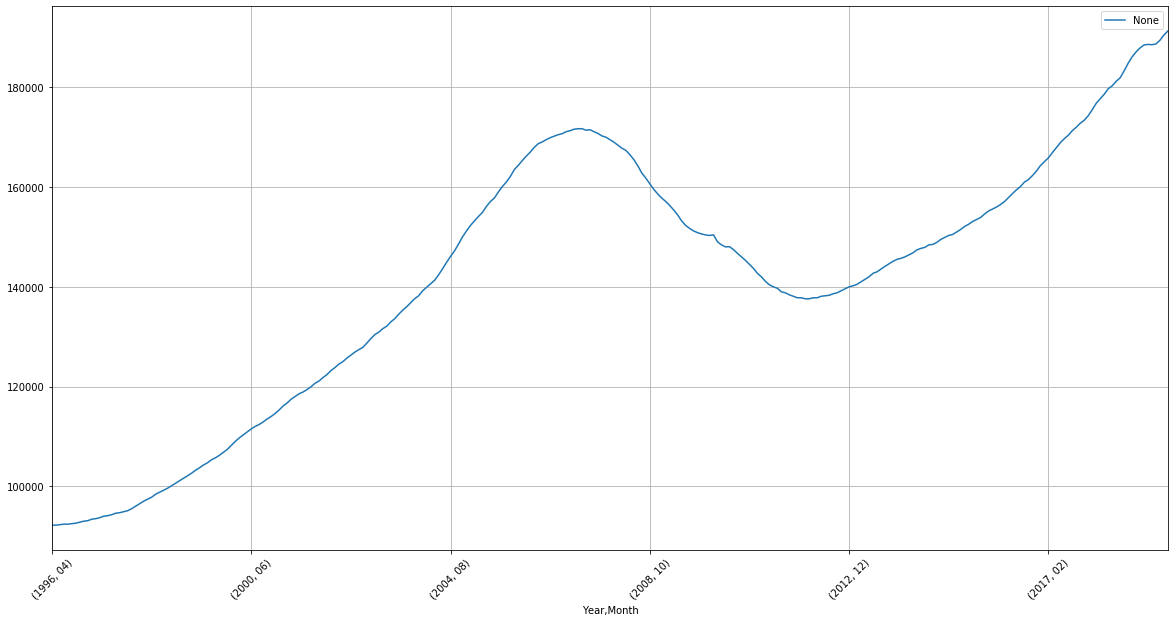

Year                                                                                         1996  \
Month                                                                                          04   
State RegionID RegionName  Metro                            CountyName         SizeRank             
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         169300.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         157700.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          86500.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         114000.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          86600.0   

Year                                                                                               \
Month                                                                                          05   
State RegionID RegionName  Metro                            CountyName         SizeRank             
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         169800.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         157600.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          86600.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         115100.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          86400.0   

Year                                                                                               \
Month                                                                                          06   
State RegionID RegionName  Metro                            CountyName         SizeRank             
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         170300.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         157500.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          86600.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         116100.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          86300.0   

Year                                                                                               \
Month                                                                                          07   
State RegionID RegionName  Metro                            CountyName         SizeRank             
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         170600.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         157300.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          86700.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         116600.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          86300.0   

Year                                                                                               \
Month                                                                                          08   
State RegionID RegionName  Metro                            CountyName         SizeRank             
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         170800.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         157200.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          87000.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4         116800.0   
TX    6915     San Antonio San Antonio-New Braunfels     

In [136]:
median_value_all = median_value_all_src.copy()
#median_value_all['State'] = median_value_all["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_value_all['City'] = median_value_all["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_value_all = median_value_all.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_value_all = median_value_all.query('City == "United States"')
#median_value_all = median_value_all[~median_value_all['City'].str.contains("United States")]
median_value_all.set_index(['State','RegionID','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_value_all.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_value_all.columns],names=['Year','Month'])
median_value_all = median_value_all#.stack(level=0)

median_value_all.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_value_all.head()

## Median Value Per Square Foot - All Homes - Monthly

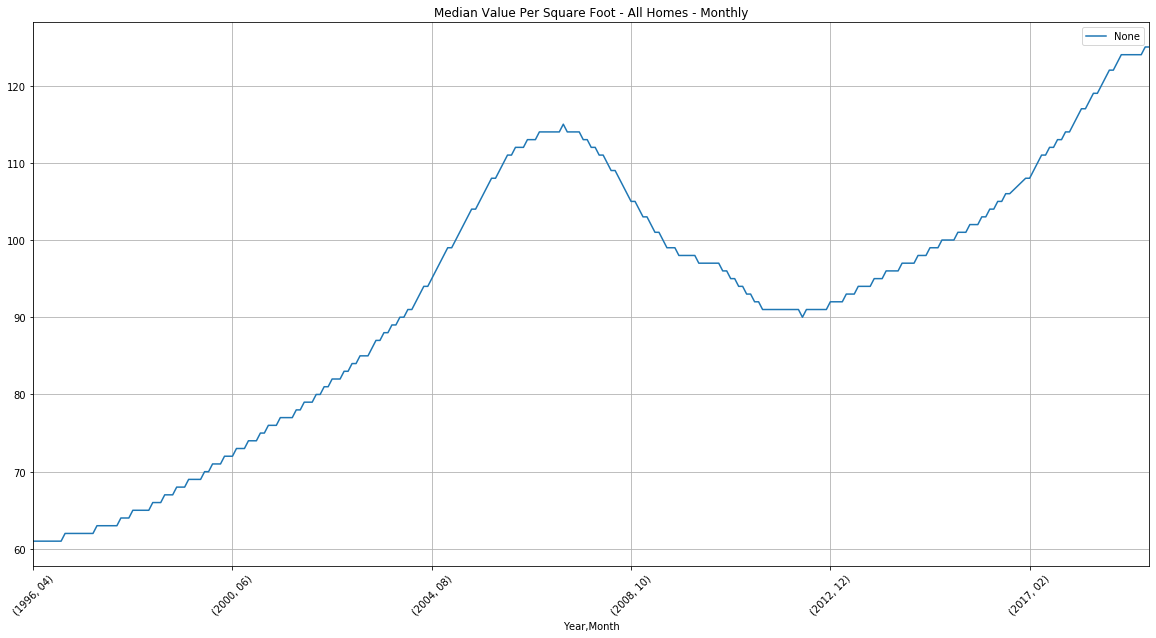

Year                                                                                      1996  \
Month                                                                                       04   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         130.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         110.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          50.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4          88.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          54.0   

Year                                                                                            \
Month                                                                                       05   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         131.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         110.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          50.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4          89.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          54.0   

Year                                                                                            \
Month                                                                                       06   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         131.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         110.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          50.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4          89.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          53.0   

Year                                                                                            \
Month                                                                                       07   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         131.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         110.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          51.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4          89.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          53.0   

Year                                                                                            \
Month                                                                                       08   
State RegionID RegionName  Metro                            CountyName         SizeRank          
NY    6181     New York    New York-Newark-Jersey City      Queens County      1         131.0   
CA    12447    Los Angeles Los Angeles-Long Beach-Anaheim   Los Angeles County 2         110.0   
TX    39051    Houston     Houston-The Woodlands-Sugar Land Harris County      3          51.0   
IL    17426    Chicago     Chicago-Naperville-Elgin         Cook County        4          89.0   
TX    6915     San Antonio San Antonio-New Braunfels        Bexar County       5          54.0   

Year                                                                       

In [133]:
median_value_all_sqft = median_value_all_sqft_src.copy()
#median_value_all_sqft['State'] = median_value_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_value_all_sqft['City'] = median_value_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_value_all_sqft = median_value_all_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_value_all_sqft = median_value_all_sqft.query('City == "United States"')
#median_value_all_sqft = median_value_all_sqft[~median_value_all_sqft['City'].str.contains("United States")]
median_value_all_sqft.set_index(['State','RegionID','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_value_all_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_value_all_sqft.columns],names=['Year','Month'])
median_value_all_sqft = median_value_all_sqft#.stack(level=0)


#conv = np.vectorize(mdates.strpdate2num('%Y-%m'))
title = 'Median Value Per Square Foot - All Homes - Monthly'
ax = median_value_all_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
ax.axvline(dt.datetime(2008, 12, 21))
ax.set_title(f'{title}')

plt.legend(loc='best')
plt.show()

median_value_all_sqft.head()

In [140]:
sales_count.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,12447,Los Angeles,California,1,1461.0,1746.0,1844.0,1954.0,2102.0,1893.0,...,2174.0,2118.0,1711.0,1715.0,2189.0,2586.0,2680.0,2510.0,2691.0,2891.0
1,39051,Houston,Texas,2,NaN,NaN,NaN,NaN,NaN,NaN,...,3358.0,3611.0,2516.0,2530.0,3237.0,3566.0,3349.0,2803.0,3009.0,2017.0
2,17426,Chicago,Illinois,3,2917.0,2988.0,2951.0,3244.0,3533.0,3385.0,...,2733.0,3365.0,2062.0,2116.0,2860.0,3369.0,3862.0,3732.0,3915.0,4495.0
3,6915,San Antonio,Texas,4,1529.0,1600.0,1654.0,1812.0,1705.0,1529.0,...,2128.0,2026.0,1672.0,1463.0,1915.0,2052.0,2252.0,2054.0,1844.0,NaN
4,13271,Philadelphia,Pennsylvania,5,1586.0,1800.0,1697.0,1924.0,1982.0,1733.0,...,2061.0,2167.0,1829.0,1435.0,1909.0,2086.0,2669.0,2287.0,1466.0,NaN


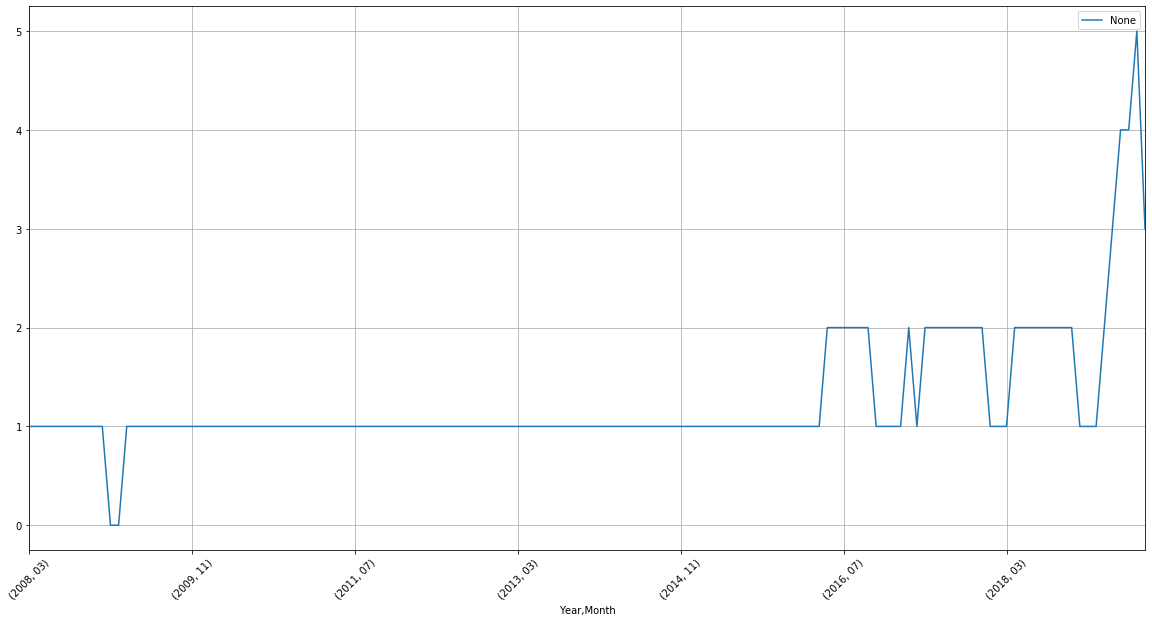

Year                                           2008                          \
Month                                            03      04      05      06   
StateName    RegionID RegionName   SizeRank                                   
California   12447    Los Angeles  1         1461.0  1746.0  1844.0  1954.0   
Texas        39051    Houston      2            NaN     NaN     NaN     NaN   
Illinois     17426    Chicago      3         2917.0  2988.0  2951.0  3244.0   
Texas        6915     San Antonio  4         1529.0  1600.0  1654.0  1812.0   
Pennsylvania 13271    Philadelphia 5         1586.0  1800.0  1697.0  1924.0   

Year                                                                         \
Month                                            07      08      09      10   
StateName    RegionID RegionName   SizeRank                                   
California   12447    Los Angeles  1         2102.0  1893.0  1949.0  2171.0   
Texas        39051    Houston      2            NaN     NaN     NaN     NaN   
Illinois     17426    Chicago      3         3533.0  3385.0  3016.0  2869.0   
Texas        6915     San Antonio  4         1705.0  1529.0  1551.0  1536.0   
Pennsylvania 13271    Philadelphia 5         1982.0  1733.0  1606.0  1545.0   

Year                                                         ...    2018  \
Month                                            11      12  ...      11   
StateName    RegionID RegionName   SizeRank                  ...           
California   12447    Los Angeles  1         1569.0  2050.0  ...  2174.0   
Texas        39051    Houston      2            NaN     NaN  ...  3358.0   
Illinois     17426    Chicago      3         1869.0  2108.0  ...  2733.0   
Texas        6915     San Antonio  4         1003.0  1265.0  ...  2128.0   
Pennsylvania 13271    Philadelphia 5         1143.0  1345.0  ...  2061.0   

Year                                                   2019                  \
Month                                            12      01      02      03   
StateName    RegionID RegionName   SizeRank                                   
California   12447    Los Angeles  1         2118.0  1711.0  1715.0  2189.0   
Texas        39051    Houston      2         3611.0  2516.0  2530.0  3237.0   
Illinois     17426    Chicago      3         3365.0  2062.0  2116.0  2860.0   
Texas        6915     San Antonio  4         2026.0  1672.0  1463.0  1915.0   
Pennsylvania 13271    Philadelphia 5         2167.0  1829.0  1435.0  1909.0   

Year                                                                         \
Month                                            04      05      06      07   
StateName    RegionID RegionName   SizeRank                                   
California   12447    Los Angeles  1         2586.0  2680.0  2510.0  2691.0   
Texas        39051    Houston      2         3566.0  3349.0  2803.0  3009.0   
Illinois     17426    Chicago      3         3369.0  3862.0  3732.0  3915.0   
Texas        6915     San Antonio  4         2052.0  2252.0  2054.0  1844.0   
Pennsylvania 13271    Philadelphia 5         2086.0  2669.0  2287.0  1466.0   

Year                                                 
Month                                            08  
StateName    RegionID RegionName   SizeRank          
California   12447    Los Angeles  1         2891.0  
Texas        39051    Houston      2         2017.0  
Illinois     17426    Chicago      3         4495.0  
Texas        6915     San Antonio  4            NaN  
Pennsylvania 13271    Philadelphia 5            NaN  

[5 rows x 138 columns]

In [141]:
sales_count = sales_count_src.copy()
#sales_count['State'] = sales_count["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#sales_count['City'] = sales_count["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#sales_count = sales_count.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#sales_count = sales_count.query('City == "United States"')
#sales_count = sales_count[~sales_count['City'].str.contains("United States")]
sales_count.set_index(['StateName','RegionID','RegionName','SizeRank'],inplace=True)
sales_count.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in sales_count.columns],names=['Year','Month'])
sales_count = sales_count#.stack(level=0)

sales_count.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

sales_count.head()